In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Delhi_v2.csv")

In [3]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [5]:
df1=df[['price', 'area','Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift']]

In [6]:
df1.columns

Index(['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony', 'Status',
       'neworold', 'parking', 'Furnished_status', 'Lift'],
      dtype='object')

In [7]:
df1.head()

,price,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift
0,5600000.0,1350.0,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0
1,8800000.0,1490.0,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0
2,16500000.0,2385.0,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN
3,3810000.0,1050.0,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0
4,6200000.0,1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   Bedrooms          7738 non-null   float64
 3   Bathrooms         7738 non-null   float64
 4   Balcony           5166 non-null   float64
 5   Status            7164 non-null   object 
 6   neworold          7738 non-null   object 
 7   parking           2612 non-null   float64
 8   Furnished_status  4124 non-null   object 
 9   Lift              1733 non-null   float64
dtypes: float64(7), object(3)
memory usage: 604.7+ KB


In [9]:
df1.drop(['parking','Furnished_status','Lift'], axis=1, inplace=True)

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\1321158330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['parking','Furnished_status','Lift'], axis=1, inplace=True)


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7738 non-null   float64
 1   area       7738 non-null   float64
 2   Bedrooms   7738 non-null   float64
 3   Bathrooms  7738 non-null   float64
 4   Balcony    5166 non-null   float64
 5   Status     7164 non-null   object 
 6   neworold   7738 non-null   object 
dtypes: float64(5), object(2)
memory usage: 423.3+ KB


In [11]:
df1.shape

(7738, 7)

In [12]:
df1['Balcony'] = pd.to_numeric(df1['Balcony'], errors='coerce').fillna(df1['Balcony'].mode()[0]).astype(int)

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\4023670141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Balcony'] = pd.to_numeric(df1['Balcony'], errors='coerce').fillna(df1['Balcony'].mode()[0]).astype(int)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7738 non-null   float64
 1   area       7738 non-null   float64
 2   Bedrooms   7738 non-null   float64
 3   Bathrooms  7738 non-null   float64
 4   Balcony    7738 non-null   int64  
 5   Status     7164 non-null   object 
 6   neworold   7738 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 423.3+ KB


In [14]:
df1['Balcony'].unique()

array([ 2,  3,  1,  4,  5, 10,  7,  8,  6,  9])

In [15]:
df1['Status'].value_counts()

Status
Ready to Move         7148
Under Construction      16
Name: count, dtype: int64

In [16]:
type(df1['Status'][0])

str

In [17]:
df1['Status'].unique()

array(['Under Construction', 'Ready to Move', nan], dtype=object)

In [18]:
df1['Status'] = df1['Status'].map({'Under Construction':0,'Ready to Move':1})

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\2419262156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Status'] = df1['Status'].map({'Under Construction':0,'Ready to Move':1})


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7738 non-null   float64
 1   area       7738 non-null   float64
 2   Bedrooms   7738 non-null   float64
 3   Bathrooms  7738 non-null   float64
 4   Balcony    7738 non-null   int64  
 5   Status     7164 non-null   float64
 6   neworold   7738 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 423.3+ KB


In [20]:
df1['Status'].fillna(df1['Status'].mode()[0], inplace=True)

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\2601780422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Status'].fillna(df1['Status'].mode()[0], inplace=True)
C:\Users\giris\AppData\Local\Temp\ipykernel_19364\2601780422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Status'].fillna(df1['Status'].mode()[0], inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7738 non-null   float64
 1   area       7738 non-null   float64
 2   Bedrooms   7738 non-null   float64
 3   Bathrooms  7738 non-null   float64
 4   Balcony    7738 non-null   int64  
 5   Status     7738 non-null   float64
 6   neworold   7738 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 423.3+ KB


In [22]:
df1['neworold'].unique()

array(['New Property', 'Resale'], dtype=object)

In [23]:
df1['neworold'] = df1['neworold'].map({'New Property':1,'Resale':0})

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\2071499777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['neworold'] = df1['neworold'].map({'New Property':1,'Resale':0})


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7738 non-null   float64
 1   area       7738 non-null   float64
 2   Bedrooms   7738 non-null   float64
 3   Bathrooms  7738 non-null   float64
 4   Balcony    7738 non-null   int64  
 5   Status     7738 non-null   float64
 6   neworold   7738 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 423.3 KB


In [25]:
df1[['Bedrooms','Bathrooms','Status']]=df1[['Bedrooms','Bathrooms','Status']].astype(int)

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\2248131038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Bedrooms','Bathrooms','Status']]=df1[['Bedrooms','Bathrooms','Status']].astype(int)


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7738 non-null   float64
 1   area       7738 non-null   float64
 2   Bedrooms   7738 non-null   int64  
 3   Bathrooms  7738 non-null   int64  
 4   Balcony    7738 non-null   int64  
 5   Status     7738 non-null   int64  
 6   neworold   7738 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 423.3 KB


<Axes: >

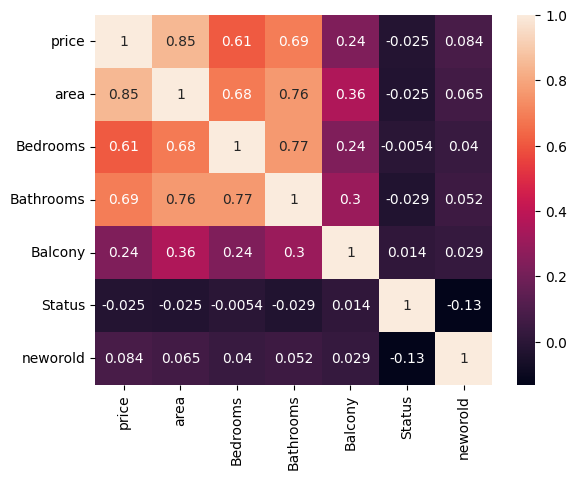

In [27]:
sns.heatmap(df1.corr(),annot=True)

In [28]:
df1.drop(['Status','neworold'],axis=1,inplace=True)

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\1124243914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Status','neworold'],axis=1,inplace=True)


<Axes: >

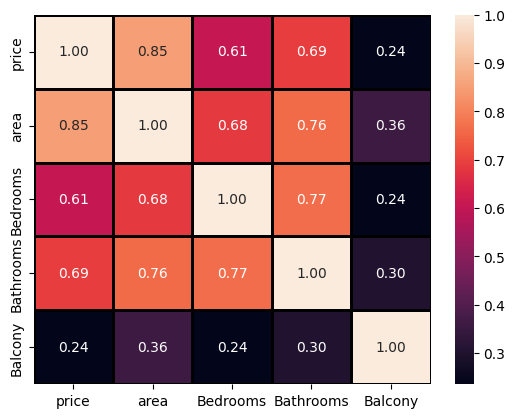

In [29]:
sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='black',fmt='.2f')

<Axes: >

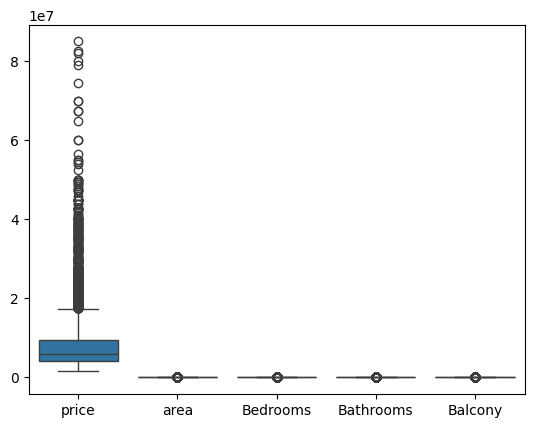

In [30]:
sns.boxplot(df1)

In [31]:
df1.head(10)

,price,area,Bedrooms,Bathrooms,Balcony
0,5600000.0,1350.0,3,3,2
1,8800000.0,1490.0,3,3,2
2,16500000.0,2385.0,4,5,2
3,3810000.0,1050.0,2,2,3
4,6200000.0,1350.0,2,2,3
5,3700000.0,1150.0,2,2,3
6,3270000.0,890.0,2,2,3
7,3990000.0,850.0,2,2,1
8,3500000.0,960.0,2,2,2
9,5500000.0,1400.0,3,3,4


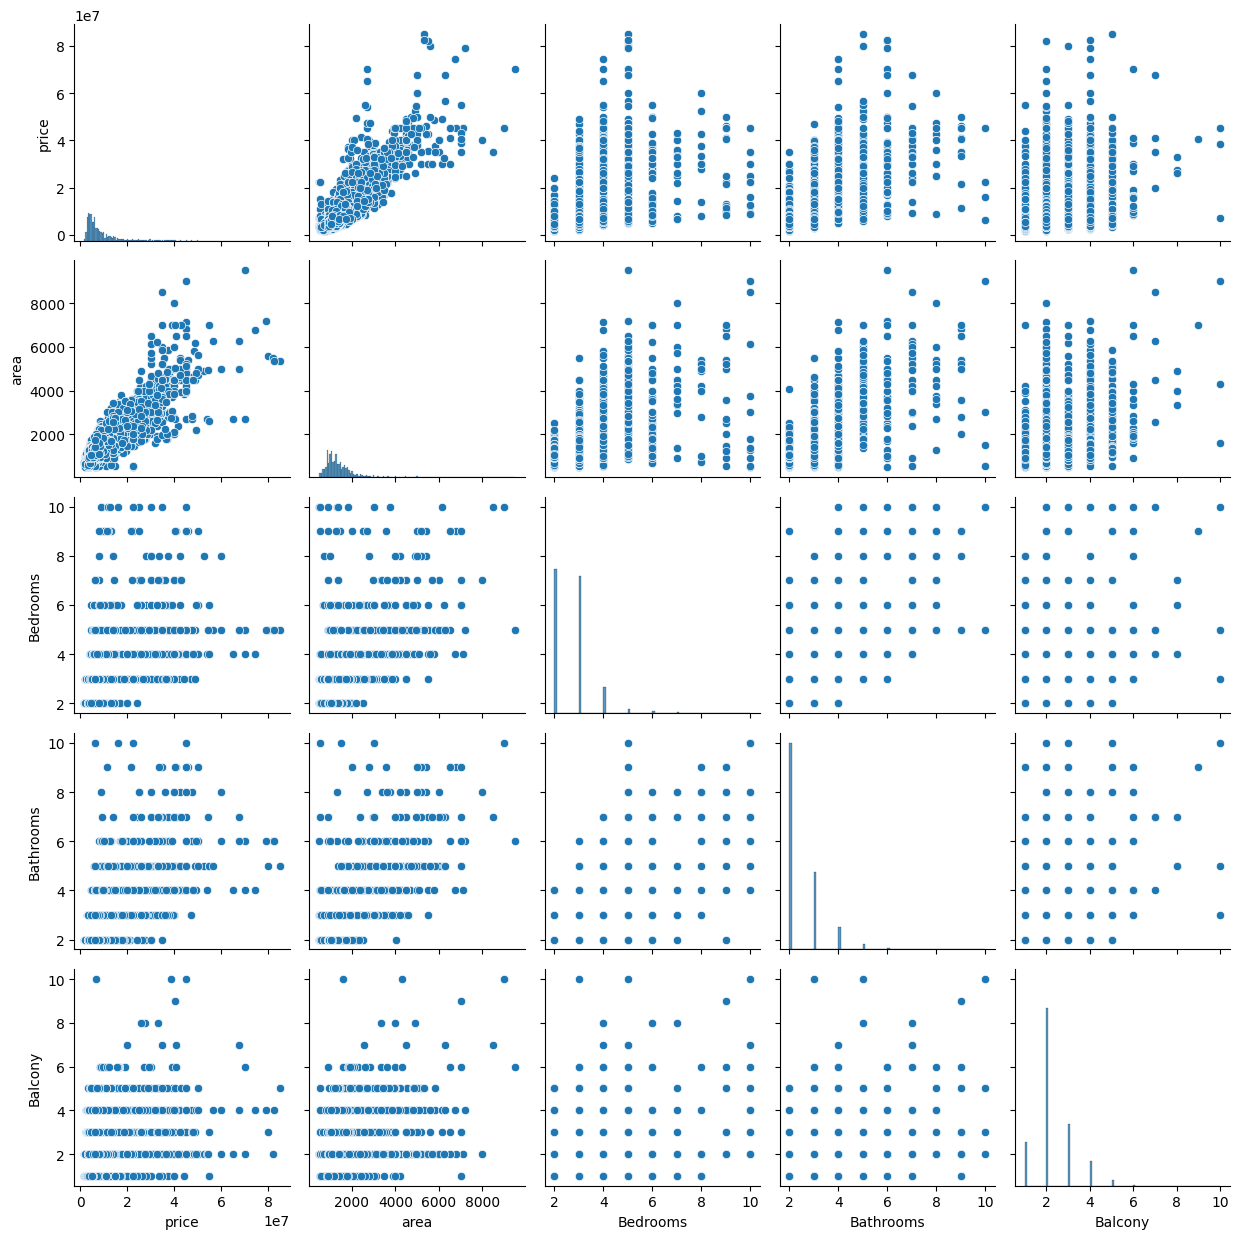

In [32]:
sns.pairplot(df1)
plt.tight_layout()

C:\Users\giris\AppData\Local\Temp\ipykernel_19364\2941988235.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(df1['price'],df1['area'],alpha=0.5,cmap='warmcool',vmin=0,vmax=1000000)


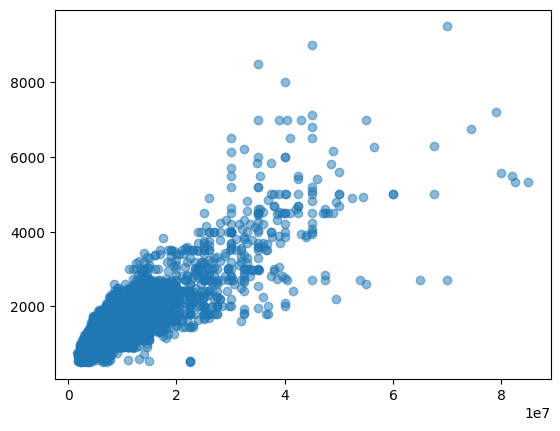

In [33]:
plt.scatter(df1['price'],df1['area'],alpha=0.5,cmap='warmcool',vmin=0,vmax=1000000)

In [34]:
df1.head(10)

,price,area,Bedrooms,Bathrooms,Balcony
0,5600000.0,1350.0,3,3,2
1,8800000.0,1490.0,3,3,2
2,16500000.0,2385.0,4,5,2
3,3810000.0,1050.0,2,2,3
4,6200000.0,1350.0,2,2,3
5,3700000.0,1150.0,2,2,3
6,3270000.0,890.0,2,2,3
7,3990000.0,850.0,2,2,1
8,3500000.0,960.0,2,2,2
9,5500000.0,1400.0,3,3,4


In [35]:
df1.columns

Index(['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony'], dtype='object')

<Axes: >

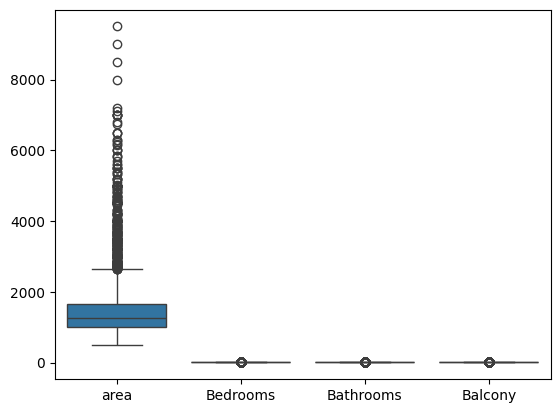

In [36]:
sns.boxplot(data=df1.drop('price',axis=1))

In [37]:
qunt_25=df1['area'].quantile(0.25)
qunt_75=df1['area'].quantile(0.75)
IQR=qunt_75-qunt_25
IQR

np.float64(660.0)

In [38]:
qunt_25

np.float64(990.0)

In [39]:
qunt_75

np.float64(1650.0)

In [40]:
df1.describe()

,price,area,Bedrooms,Bathrooms,Balcony
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,2.708193,2.501163,2.284699
std,7.223197e+06,718.929581,0.877026,0.867050,0.907924
min,1.700000e+06,501.000000,2.000000,2.000000,1.000000
25%,4.200000e+06,990.000000,2.000000,2.000000,2.000000
50%,6.000000e+06,1250.000000,3.000000,2.000000,2.000000
75%,9.500000e+06,1650.000000,3.000000,3.000000,3.000000
max,8.500000e+07,9500.000000,10.000000,10.000000,10.000000


In [41]:
lower_bound=qunt_25-1.5*IQR
higher_bound=qunt_75+1.5*IQR

In [42]:
df1=df1[(df1['area']>lower_bound)&(df1['area']<higher_bound)]
df1

,price,area,Bedrooms,Bathrooms,Balcony
0,5600000.0,1350.0,3,3,2
1,8800000.0,1490.0,3,3,2
2,16500000.0,2385.0,4,5,2
3,3810000.0,1050.0,2,2,3
4,6200000.0,1350.0,2,2,3
...,...,...,...,...,...
7733,7900000.0,1095.0,2,2,2
7734,4510000.0,1060.0,2,2,3
7735,7000000.0,1898.0,4,3,5
7736,6500000.0,1400.0,3,3,2


In [43]:
df1.shape

(7389, 5)

In [46]:
df1['area'].isna().sum()

np.int64(0)

<Axes: >

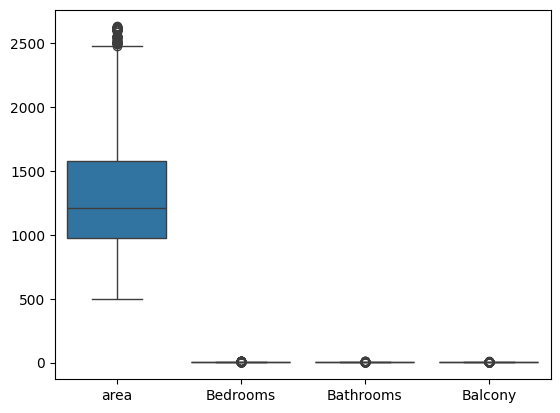

In [45]:
sns.boxplot(data=df1.drop('price',axis=1))

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[['area','Bedrooms','Bathrooms','Balcony']] = scaler.fit_transform(df1[['area','Bedrooms','Bathrooms','Balcony']])

<Axes: >

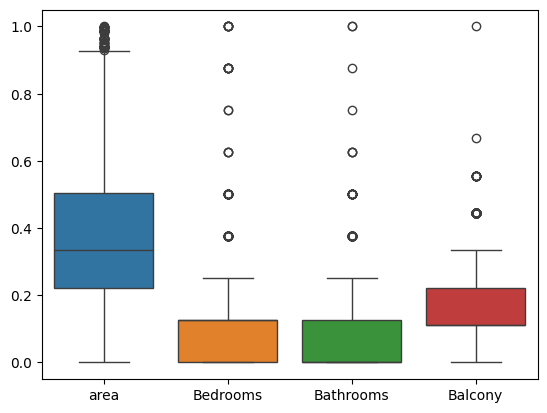

In [51]:
sns.boxplot(data=df1.drop('price',axis=1))

In [52]:
df1.head(10)

,price,area,Bedrooms,Bathrooms,Balcony
0,5600000.0,0.398592,0.125,0.125,0.111111
1,8800000.0,0.464319,0.125,0.125,0.111111
2,16500000.0,0.884507,0.250,0.375,0.111111
3,3810000.0,0.257746,0.000,0.000,0.222222
4,6200000.0,0.398592,0.000,0.000,0.222222
5,3700000.0,0.304695,0.000,0.000,0.222222
6,3270000.0,0.182629,0.000,0.000,0.222222
7,3990000.0,0.163850,0.000,0.000,0.000000
8,3500000.0,0.215493,0.000,0.000,0.111111
9,5500000.0,0.422066,0.125,0.125,0.333333


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
df1.columns

Index(['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony'], dtype='object')

In [56]:
X=df1[['area', 'Bedrooms', 'Bathrooms', 'Balcony']]
y=df1['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
y_pred=model.predict(X_test)
y_pred

array([ 7904611.49186536,  3702048.06621901, 11428380.40563792, ...,
        6812785.17259147,  7458578.91644366,  8110437.29051916],
      shape=(1478,))

In [77]:
y_pred[0]

np.float64(7904611.491865365)

In [87]:
y_test=y_test.to_numpy()

In [88]:
y_test[0]

np.float64(6200000.0)